# Libraries 

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Load Data Set

In [64]:
def load_data(file_path):
    data=pd.read_csv(file_path)
    print(data.head())
    return data

# Classification 

In [65]:
def classify_columns(data_frame):
    categorical_columns = data_frame.select_dtypes(include=['object']).columns
    numeric_columns = data_frame.select_dtypes(include=['int64', 'float64']).columns
    return list(categorical_columns), list(numeric_columns)


# Preprocessing 

In [66]:
def preprocess_target_variable(data_frame, target_variable):
    encoder = LabelEncoder()
    data_frame[target_variable] = encoder.fit_transform(data_frame[target_variable])
    return data_frame


def preprocess_categorical_data(data_frame, column_name):
    if column_name != 'Sales':
        imputer = SimpleImputer(strategy='most_frequent')
        transformed_values = imputer.fit_transform(data_frame[[column_name]])
        data_frame[column_name] = transformed_values[:, 0]
        encoder = OneHotEncoder(handle_unknown='ignore')
        encoded_data = encoder.fit_transform(data_frame[[column_name]])
        encoded_df = pd.DataFrame(encoded_data.toarray(), columns=[f"{column_name}_{category}" for category in encoder.categories_[0]])
        data_frame = pd.concat([data_frame, encoded_df], axis=1)
        data_frame.drop(column_name, axis=1, inplace=True)
    return data_frame


def preprocess_numeric_data(data_frame, column_name):
    if column_name != 'Sales':
        imputer = SimpleImputer(strategy='median')
        data_frame[column_name] = imputer.fit_transform(data_frame[[column_name]])
        scaler = StandardScaler()
        data_frame[column_name] = scaler.fit_transform(data_frame[[column_name]])
    return data_frame

# Split DAta 

In [67]:
def split_data(data, target_variable):
    if target_variable not in data.columns:
        raise ValueError(f"Target variable '{target_variable}' not found in the dataset columns.")
    X = data.drop(columns=[target_variable], errors='ignore')  
    y = data[target_variable]
    return X, y


# Train MOdel 

In [68]:
def train_linear_regression(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse

def make_predictions(model, new_data):
    predictions = model.predict(new_data)
    return predictions

# Plots

In [69]:
def plot_box_plots(X):
    X.boxplot()
    plt.title('Box Plot of Features')
    plt.show()


def plot_histograms(X):
    X.hist()
    plt.suptitle('Histograms of Features')
    plt.show()

# Remove Outliers

In [70]:
def remove_numeric_outliers(df, multiplier=1.5):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in numeric_columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - multiplier * iqr
        upper_bound = q3 + multiplier * iqr
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Feature Selection 

In [71]:
def feature_selection(dataset, target_variable, k=5):
    if target_variable not in dataset.columns:
        raise ValueError(f"Target variable '{target_variable}' not found in the dataset columns.")
    
    X = dataset.drop(target_variable, axis=1)
    y = dataset[target_variable]
    if not isinstance(y.dtype, pd.CategoricalDtype):
        y = pd.Categorical(y).codes
    k_best = SelectKBest(score_func=f_classif, k=min(k, len(X.columns)))  
    X_selected = k_best.fit_transform(X, y)
    selected_feature_indices = k_best.get_support(indices=True)
    selected_columns = X.columns[selected_feature_indices]

    selected_dataset = dataset[selected_columns]
    selected_dataset[target_variable] = dataset[target_variable]  
    
    return selected_dataset


# Model Selection 

In [72]:


def train_and_evaluate_models(X_train, y_train, X_test, y_test, target_variable):
    if target_variable != 'Sales':
        raise ValueError("Invalid target variable name. Only 'Sales' is supported for regression.")

   
    linear_regression_model = LinearRegression()
    random_forest_model = RandomForestRegressor(random_state=42)
    xgboost_model = XGBRegressor(random_state=42)


    linear_regression_model.fit(X_train, y_train)
    random_forest_model.fit(X_train, y_train)
    xgboost_model.fit(X_train, y_train)

    linear_regression_predictions = linear_regression_model.predict(X_test)
    random_forest_predictions = random_forest_model.predict(X_test)
    xgboost_predictions = xgboost_model.predict(X_test)


    linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)
    random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
    xgboost_mse = mean_squared_error(y_test, xgboost_predictions)

    print("Linear Regression MSE:", linear_regression_mse)
    print("Random Forest MSE:", random_forest_mse)
    print("XGBoost MSE:", xgboost_mse)

    best_model = min([
        ('Linear Regression', linear_regression_mse),
        ('Random Forest', random_forest_mse),
        ('XGBoost', xgboost_mse)
    ], key=lambda x: x[1])

    print(f"\nBest Model: {best_model[0]} with MSE: {best_model[1]}")

    return best_model[0], best_model[1]


# Main 

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


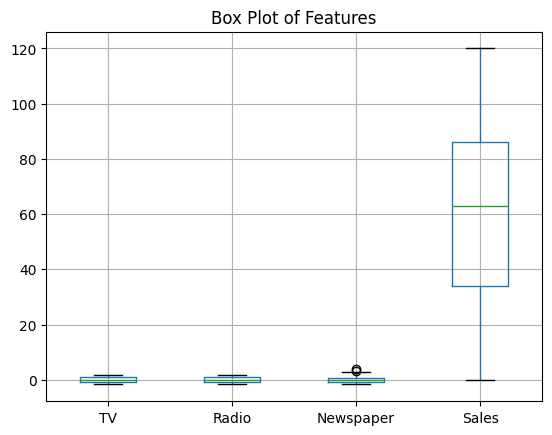

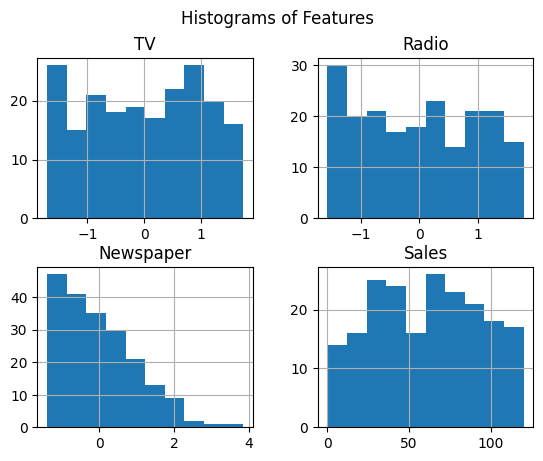

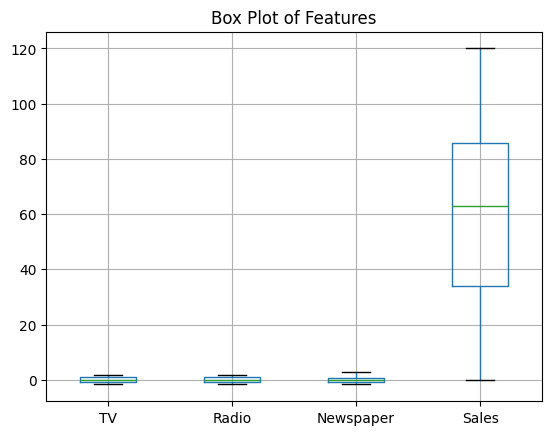

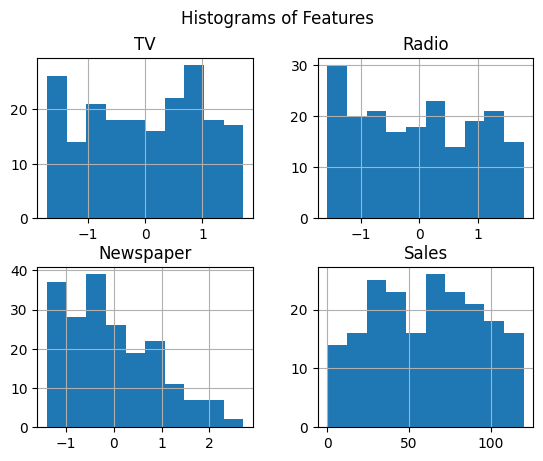

Linear Regression MSE: 91.00134293836877
Random Forest MSE: 46.034994999999995
XGBoost MSE: 50.22300879578791

Best Model: Random Forest with MSE: 46.034994999999995


In [74]:

def main():
    file_path = "advertising.csv"  
    data = load_data(file_path)
    data = preprocess_target_variable(data, 'Sales')
    categorical_columns, numeric_columns = classify_columns(data)
    for column in categorical_columns:
        data = preprocess_categorical_data(data, column)
    for column in numeric_columns:
        data = preprocess_numeric_data(data, column)
    plot_box_plots(data)
    plot_histograms(data)
    data = remove_numeric_outliers(data)
    plot_box_plots(data)
    plot_histograms(data)
    try:
        selected_features = feature_selection(data, 'Sales', k=5)
    except ValueError as e:
        print(e)
        return
    X, y = split_data(selected_features, 'Sales')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    best_model, best_mse = train_and_evaluate_models(X_train, y_train, X_test, y_test, 'Sales')

if __name__ == "__main__":
    main()
